In [2]:
pip install opencv-python

     |████████████████████████████████| 40.3 MB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#conda install pytorch torchvision cudatoolkit=10.2 -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=10.2

Current channels:

  - https://conda.anaconda.org/pytorch/osx-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c pytorch torchvision

Solving environment: done

## Package Plan ##

  environment location: /Users/dugongzzz/opt/anaconda3/envs/conda36env

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    intel-openmp-2020.2        |              258         952 KB
    mkl-2020.2                 |              260        99.7 MB
    ninja-1.10.2               |   py36hf7b0b51_0         101 KB
    pytorch-1.4.0              |          py3.6_0        34.5 MB  pytorch
    torchvision-0.5.0          |         py36_cpu         5.8 MB  pytorch
    ------------------------------------------------------------
                                           Total:       141.0 MB

The following NEW packages will be INSTALLED:

  intel-openmp       pkgs/main/osx-64::intel-openmp-2020.2-258
  mkl                pkgs/main/osx-64::mkl-2020.2-260
  ninja              pkgs/main/osx-64::ninja-1.10.2-py

In [4]:
pip install keras==2.1.5

  Using cached Keras-2.1.5-py2.py3-none-any.whl (334 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 46.1 MB/s  eta 0:00:01
     |████████████████████████████████| 153 kB 91.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 41.3 MB/s  eta 0:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/dugongzzz/opt/anaconda3/envs/conda36env

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    absl-py-0.12.0             |   py36hecd8cb5_0         174 KB
    astor-0.8.1                |   py36hecd8cb5_0          47 KB
    coverage-5.5               |   py36h9ed2024_2         253 KB
    cython-0.29.22             |   py36h23ab428_0         1.8 MB
    gast-0.4.0                 |             py_0          15 KB
    grpcio-1.36.1              |   py36h97de6d8_1         1.8 MB
    markdown-3.3.4             |   py36hecd8c

In [7]:
import os
import pandas as pd
from glob import glob
import cv2
import matplotlib.pylab as plt
from facenet_pytorch import MTCNN
from PIL import Image
import os
import time
import tarfile
import urllib
import urllib.request
import torch
from torch.utils.data import DataLoader

In [8]:
# Determine if an nvidia GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [4]:
# download zipped file from github. This should be pointed to LFS later.
url = "https://github.com/AT100/cmpt733-deepfake-detection/blob/main/dataset/deepfake-detection-challenge.zip?raw=true"
filename, headers = urllib.request.urlretrieve(url, filename="deepfake-detection-challenge.zip")
print("Download done!")

Download done!


In [5]:
from zipfile import ZipFile

with ZipFile('deepfake-detection-challenge.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [9]:
# change directory accordingly
CURR_DIR = os.getcwd()
print(CURR_DIR)
INPUT_DIR = CURR_DIR + "/deepfake-detection-challenge/train_sample_videos"

/Users/dugongzzz/Documents/GitHub/cmpt733-deepfake-detection


In [10]:
videopaths = sorted(glob(os.path.join(INPUT_DIR, "*.mp4")))
print("Number of videos:", len(videopaths))

Number of videos: 18


We want to read the json file to separate real and fake videos

In [11]:
meta = INPUT_DIR + '/metadata.json'
label_df = pd.read_json(meta)
label_df = label_df.iloc[0]
labeling_dict = label_df.to_dict()

{'aagfhgtpmv.mp4': 'FAKE',
 'aapnvogymq.mp4': 'FAKE',
 'abarnvbtwb.mp4': 'REAL',
 'abofeumbvv.mp4': 'FAKE',
 'abqwwspghj.mp4': 'FAKE',
 'acifjvzvpm.mp4': 'FAKE',
 'acqfdwsrhi.mp4': 'FAKE',
 'acxnxvbsxk.mp4': 'FAKE',
 'acxwigylke.mp4': 'FAKE',
 'aczrgyricp.mp4': 'FAKE',
 'adhsbajydo.mp4': 'FAKE',
 'adohikbdaz.mp4': 'FAKE',
 'adylbeequz.mp4': 'FAKE',
 'aelfnikyqj.mp4': 'REAL',
 'aelzhcnwgf.mp4': 'FAKE',
 'aettqgevhz.mp4': 'FAKE',
 'aevrfsexku.mp4': 'FAKE',
 'afoovlsmtx.mp4': 'REAL',
 'agdkmztvby.mp4': 'FAKE',
 'agqphdxmwt.mp4': 'FAKE',
 'agrmhtjdlk.mp4': 'REAL',
 'ahbweevwpv.mp4': 'FAKE',
 'ahdbuwqxit.mp4': 'FAKE',
 'ahfazfbntc.mp4': 'FAKE',
 'ahqqqilsxt.mp4': 'REAL',
 'aipfdnwpoo.mp4': 'FAKE',
 'ajqslcypsw.mp4': 'REAL',
 'ajwpjhrbcv.mp4': 'FAKE',
 'aklqzsddfl.mp4': 'FAKE',
 'aknbdpmgua.mp4': 'FAKE',
 'aknmpoonls.mp4': 'FAKE',
 'akvmwkdyuv.mp4': 'FAKE',
 'akxoopqjqz.mp4': 'FAKE',
 'akzbnazxtz.mp4': 'FAKE',
 'aladcziidp.mp4': 'FAKE',
 'alaijyygdv.mp4': 'FAKE',
 'alninxcyhg.mp4': 'FAKE',
 

FAKE
[1053.992    169.65459 1136.7135   281.94952]
FAKE
[756.7181  154.59944 849.867   274.36188]
[1097.1886    103.365875 1184.1455    214.14851 ]
[736.1283  200.81822 773.3652  244.89355]
FAKE
[ 901.31305  166.6765  1003.685    301.05405]
FAKE
[1008.7952   122.90471 1187.4161   350.63953]
FAKE
[1026.2806    50.06485 1127.5466   188.47922]
FAKE
[862.7416   73.93547 980.00226 226.2654 ]
REAL
FAKE
[ 923.1976    108.907684 1012.37177   213.59439 ]
REAL
FAKE
[ 848.61194  175.32108 1022.50726  412.846  ]
FAKE
[ 951.56915   66.61266 1068.1699   214.85245]
FAKE
[881.4804  204.42337 949.1129  295.24716]
FAKE
[723.20264  89.49097 924.32446 336.38522]
FAKE
[594.3074 588.5493 734.0691 767.1923]
FAKE
[846.9331    77.375626 964.3773   237.28958 ]
FAKE
[900.6152  168.96413 996.03906 295.11826]
FAKE
[1040.2473   103.11484 1215.416    325.91864]
FAKE
[ 881.3906   148.42598 1080.3881   415.2737 ]
Execution time in seconds: 28.952197074890137


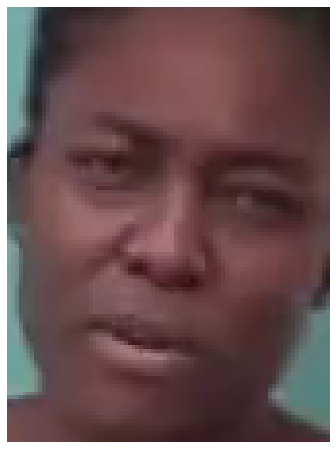

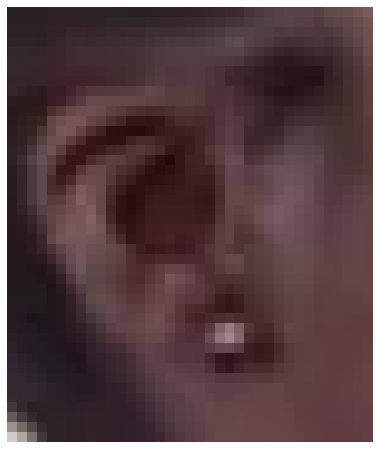

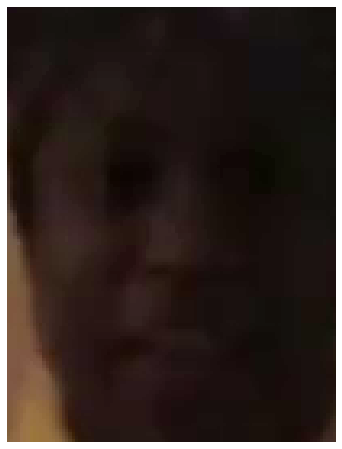

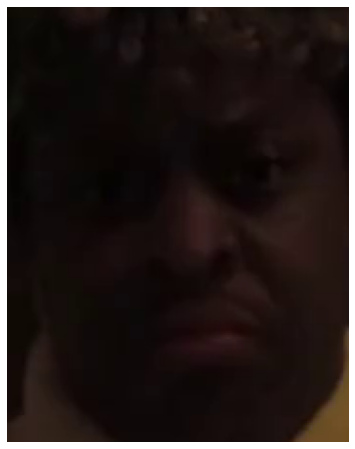

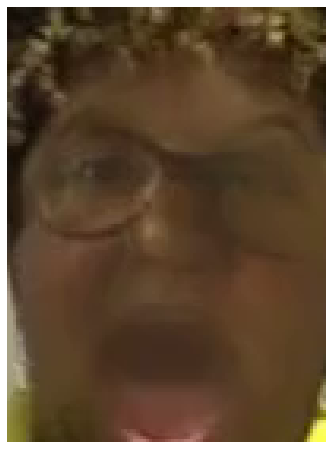

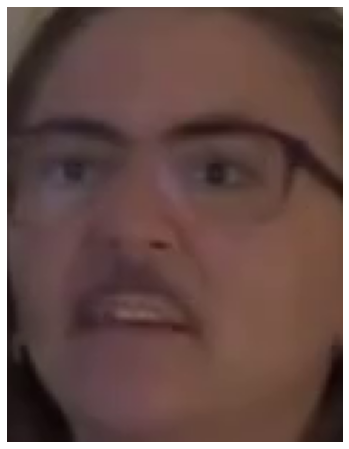

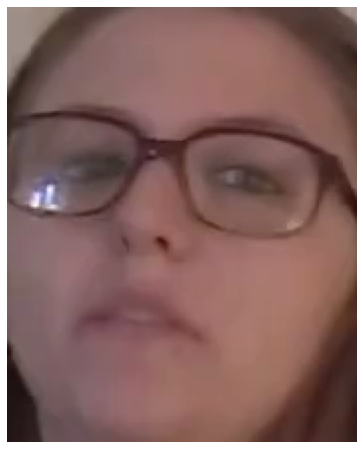

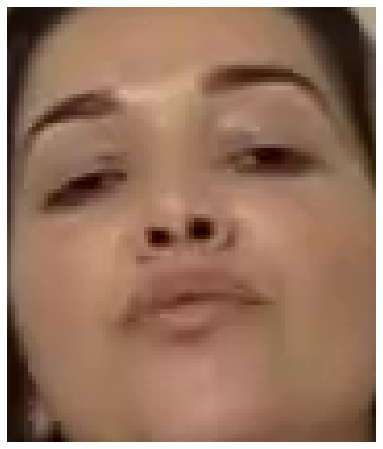

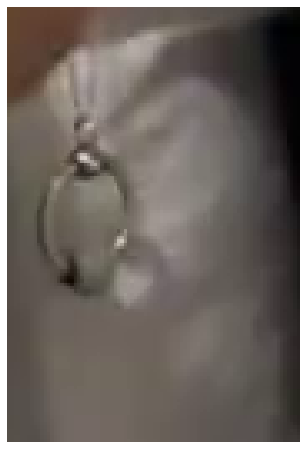

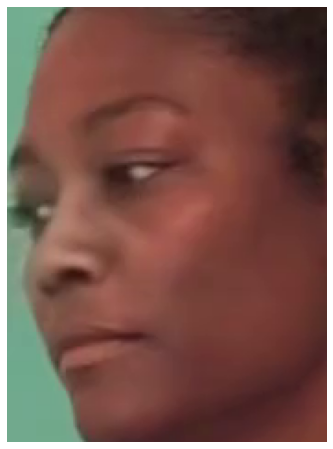

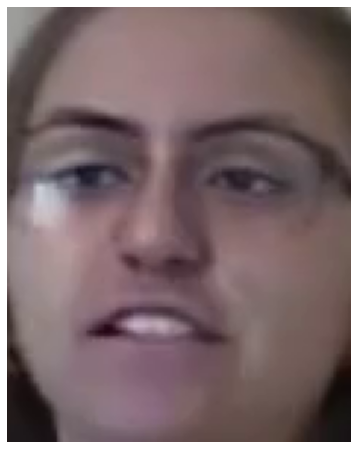

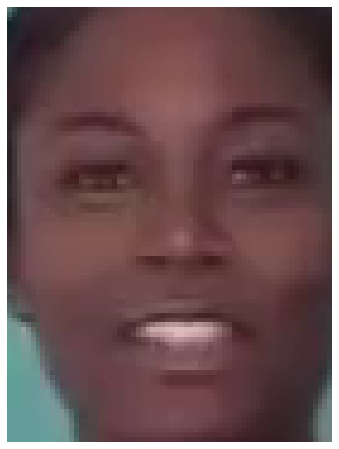

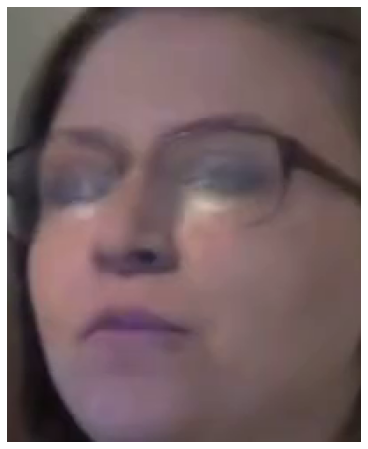

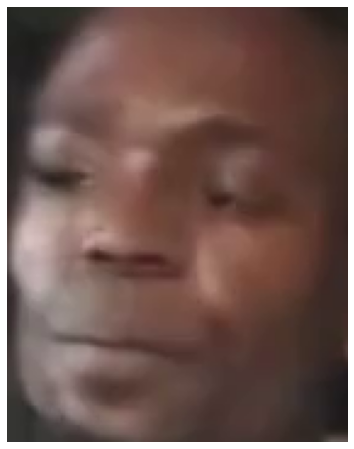

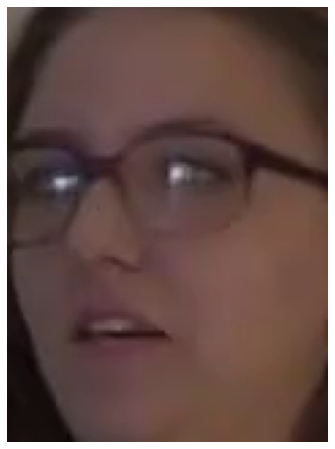

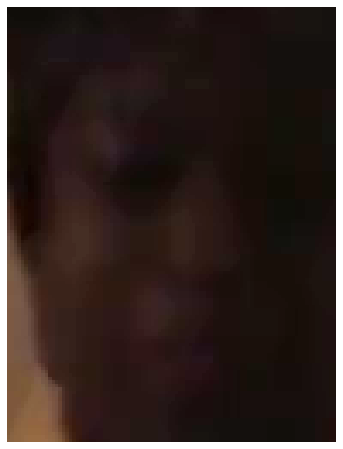

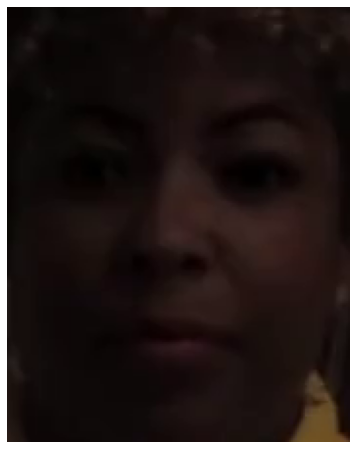

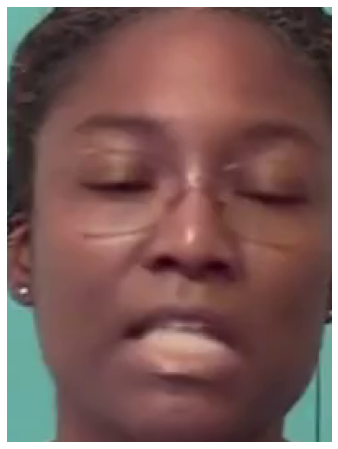

In [24]:
startTime = time.time()
from numpy.linalg import norm

for i in range(len(videopaths)):
    num = str(i)
    name = os.path.basename(videopaths[i])
    print(labeling_dict[name])
    
    width = 300
    height = 300
    dim = (width, height)
    
    v_cap = cv2.VideoCapture(videopaths[i])
    _, frame = v_cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.normalize(frame, frame, 0, 255, cv2.NORM_MINMAX)
    #frame = cv2.fastNlMeansDenoisingColored(frame,None,10,10,7,21)

    new_frame = Image.fromarray(frame)

    plt.figure(figsize=(12, 8))
    plt.imshow(new_frame)
    plt.axis('off')

    mtcnn = MTCNN(select_largest=False, keep_all=True, post_process=False)#select_largest=False, device='cuda')
    test = mtcnn(new_frame)

    # detect faces in the image
    faces = mtcnn.detect(new_frame)

    if test is None:
        print("Unable to identify face")
        savepath = CURR_DIR + '/dataset/difficult_imgs/img' + num + '.jpg'
        plt.imsave(savepath, frame)
    else:   
        for each in faces[0]:
            if labeling_dict[name] == 'FAKE':
                each1 = each.tolist()
                x, y, w, h  = each1
                detected_face = frame[int(y):int(h), int(x):int(w)]
                plt.imshow(detected_face)
                savepath = CURR_DIR + '/dataset/train_images/fake/img' + num + '.jpg'
                plt.imsave(savepath, detected_face)
            else:
                each1 = each.tolist()
                x, y, w, h  = each1
                detected_face = frame[int(y):int(h), int(x):int(w)]
                plt.imshow(detected_face)
                savepath = CURR_DIR + '/dataset/train_images/real/img' + num + '.jpg'
                plt.imsave(savepath, detected_face)
                
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))